# Chapter 10: Logistic Regression

## Import Required Packages

In [1]:
# install dmba package
!pip install dmba

In [2]:
# import necessary packages

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

from dmba import classificationSummary

## Logistric Regression

### Universal Bank Data and Preprocessing

In [3]:
# load the dataset, UniversalBank.csv
# define bank_df and preview it

bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

# Personal Loan   	Whether the customer accepts the personal loan
# Experience        Years of professional experience
# Family   		    Family size of the customer
# Education   	 	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# CCAvg   		    Avg. spending on credit cards per month ($000)
# Mortgage   	 	Value of house mortgage if any. ($000)
# Securities Account   Does the customer have a securities account with the bank?
# CD Account   	    Does the customer have a certificate of deposit (CD) account with the bank?
# Online   		    Does the customer use internet banking facilities?
# CreditCard   	    Does the customer use a credit card issued by UniversalBank?

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# check columns

bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
# rename columns using list comphrehension
# check columns again

bank_df.columns = [s.replace(' ','_') for s in bank_df.columns]
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
# check info()

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# treat education as categorical, astype('category')

bank_df.Education = bank_df.Education.astype('category')
# pd.get_dummies(), convert to dummy variables, drop_first=True, dtype='int'

bank_df = pd.get_dummies(bank_df, drop_first=True, dtype='int')

In [8]:
# preview it again (what would happen if not treating education as a categorical variable)

bank_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0


In [9]:
# predictors (x)
# dorp(columns=['']), drop columns 'Personal_Loan', 'ID', 'ZIP_Code', not relevant for model building

x = bank_df.drop(columns= ['Personal_Loan', 'ID', 'ZIP_Code'])
# outcome variable (y), Personal_Loan

y = bank_df.Personal_Loan
# partition data
# test_size=0.4, random_state=1

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

### Fit the Algorithm

In [10]:
# define logit_reg, LogisticRegression()
# fit it with training data

logit_reg = LogisticRegression()
logit_reg.fit(train_x, train_y)

C:\Users\orlan\OneDrive\Desktop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction and Probability

In [20]:
# use predict() to get predicted y from the validation dataset
# define logit_reg_pred
logit_reg_pred = logit_reg.predict(valid_x)

# get the probabilities, with predict_proba(), from the validation dataset
# define logit_reg_proba

logit_reg_proba = logit_reg.predict_proba(valid_x)

# show logit_reg_proba, or convert it to a dataframe then show it
logit_reg_proba[:,1]

# know how to locate one of the columns in the dataframe or the original array (use [:, 1])
# pd.DataFrame(logit_reg_proba).iloc[:, 1]



array([0.02809386, 0.00033474, 0.0003927 , ..., 0.00059617, 0.00309167,
       0.00604521])

In [21]:
# create a dataframe, with 4 columns: actual, p0, p1, and predicted
# understand logit_reg_proba[:, 0] and logit_reg_proba[:, 1]
# define logit_result and previwe it

logit_result = pd.DataFrame({
    'actual': valid_y,
    'p0': logit_reg_proba[:, 0],
    'p1': logit_reg_proba[:,1]
})
logit_result.head()

,actual,p0,p1
2764,0,0.971906,0.028094
4767,0,0.999665,0.000335
3814,0,0.999607,0.000393
3499,0,0.997723,0.002277
2735,0,0.915411,0.084589


## Performance Evaluation

### Confusion Matrix

In [22]:
# confusion matrix for the training dataset
# logit_reg.predict()


classificationSummary(train_y, logit_reg.predict(train_x))

Confusion Matrix (Accuracy 0.9590)

       Prediction
Actual    0    1
     0 2687   26
     1   97  190


In [23]:
# confusion matrix for the validation dataset


classificationSummary(valid_y, logit_reg.predict(valid_x))

Confusion Matrix (Accuracy 0.9550)

       Prediction
Actual    0    1
     0 1791   16
     1   74  119


### ROC-AUC Graph

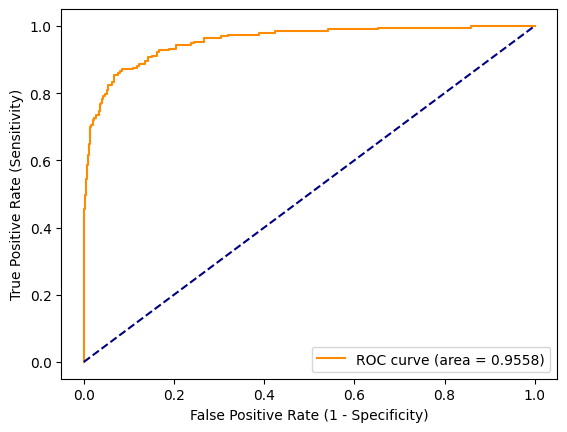

In [26]:
# for the validation dataset, focus on personal loan acceptancance
# ROC curve, returning false positive rate (fpr), true positive rate (tpr), and _
# fpr = 1 - specificity --> x axis; 
# tpr = sensitivity --> y axis
# _, a variable not needed here (thresholds/cutoff values)
# the input arguments of roc_curve() are acutal y and predicted probability, predict_proba(), [:,1]
fpr, tpr, _= roc_curve(valid_y, logit_reg.predict_proba(valid_x)[:,1])


# auc(), using false positive rate (fpr, as x) and true positive rate (tpr, as y) as inputs
# define roc_auc

roc_auc = auc(fpr, tpr)

# line plot the ROC curve, plt.plot(), x as fpr, y as tpr
# params: color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)

# line plot the dashed line, plot.plot()
# x as [0,1], y as [0,1]
# params: color='navy', linestyle='--'

plt.plot([0,1],[0,1], color='navy', linestyle='--')

# settings/formats
# plt.xlabel(), 'False Positive Rate (1 - Specificity)'
# ylabel(), 'True Positive Rate (Sensitivity)'
# show the legend, plt.legend()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
# plt.show()

**---- Back to PPT ----**